In [1]:
import sys, os
import json
import pandas as pd
import numpy as np
import time, math
import cv2
from operator import sub
import matplotlib
import matplotlib.transforms as transforms
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.latex.preamble': [r'\usepackage{amsmath}']
})

v = 27

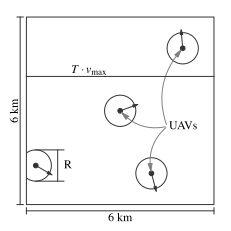

In [95]:
uav_width = 150
arrow_length = 600
R = 500

def plot_node(ax, pos, direction, mask=None, color='#333'):
    uav = matplotlib.patches.Ellipse(pos, width=uav_width, height=uav_width, fill=True, lw=1, ec='#333', fc='#333', clip_on=True)
    ax.add_patch(uav)
    x1,y1 = pos
    alpha = direction * math.pi / 180
    x2 = x1 + math.cos(alpha) * arrow_length
    y2 = y1 + math.sin(alpha) * arrow_length
    ax.arrow(x1, y1, x2-x1, y2-y1, length_includes_head=True, head_width=80, head_length=160, fc=color, zorder=2, fill=True, color=color, ls='-')
    c1 = matplotlib.patches.Ellipse(pos, width=2*R, height=2*R, fill=False, lw=1, ec='#333', clip_path=mask)
    ax.add_patch(c1)
    


fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

w = h = 6000

offset = 200

ax.plot([0, 6000], [-offset, -offset], '-', lw=1, color= '#333')
ax.plot([0, 0], [- 0.5 * offset, -1.5 * offset], '-', lw=1, color= '#333')
ax.plot([6000, 6000], [-0.5 * offset, -1.5 * offset], '-', lw=1, color= '#333')
ax.text(3000, -2.2*offset, '6 km', ha='center', va='center')

ax.plot([-offset, -offset],[0, 6000], '-', lw=1, color= '#333')
ax.plot([- 0.5 * offset, -1.5 * offset], [0, 0],'-', lw=1, color= '#333')
ax.plot( [-0.5 * offset, -1.5 * offset],[6000, 6000], '-', lw=1, color= '#333')
ax.text( -1.8*offset, 3000, '6 km', ha='center', va='center', rotation=90)

a = matplotlib.patches.Rectangle((0, 0), width=w, height=h, fill=False, lw=1, ec='#333', clip_on=True, ls='-')
ax.add_patch(a)


mask = plt.Polygon([[0, 0], [0, 6000], [6000, 6000], [6000, 0], [0,0]], fill=False, lw=0)
ax.add_patch(mask)

x1 = 300
y1 = 1250 
plot_node(ax, (3000, 3000), 20, mask)
plot_node(ax, (x1, y1), -30, mask)
plot_node(ax, (5000, 5000), 95, mask)
plot_node(ax, (4000, 1000), -75, mask)

uav_text = (4500, 2500)
ax.text(uav_text[0]+ 60, uav_text[1], 'UAVs', va='center', ha='left')
arrow = patches.FancyArrowPatch(uav_text, (3000,3000), connectionstyle=f"arc3,rad=-0.3", arrowstyle="Simple, tail_width=0, head_width=4, head_length=8", color='#808080', zorder=2)
ax.add_patch(arrow)
arrow = patches.FancyArrowPatch(uav_text, (5000,5000), connectionstyle=f"arc3,rad=-0.3", arrowstyle="Simple, tail_width=0, head_width=4, head_length=8", color='#808080', zorder=2)
ax.add_patch(arrow)
arrow = patches.FancyArrowPatch(uav_text, (4000,1000), connectionstyle=f"arc3,rad=0.3", arrowstyle="Simple, tail_width=0, head_width=4, head_length=8", color='#808080', zorder=2)
ax.add_patch(arrow)

ax.plot([0, 6000], [4100, 4100], lw=1, color='#333')
ax.text(2000, 4300, '$T \cdot v_\\mathrm{{max}}$', ha='center', va='center')

w = 900
ax.plot([x1, x1+w], [y1 + R, y1 + R], lw=1, color='#333')
ax.plot([x1, x1+w], [y1 - R, y1 - R], lw=1, color='#333')
ax.plot([x1+w - 200, x1+w - 200], [y1 - R, y1+ R], lw=1, color='#333')
ax.text(x1+w, y1, 'R', ha='left', va='center')

ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.right.set_visible(False)

fig.savefig(f"../figures/simulation_schematic_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.01)
fig.savefig(f"../figures/simulation_schematic_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.01)


plt.show()